In [139]:
import os
import matplotlib.pyplot as plt
import pandas as pd

import astropy.units as u
from astropy.io import fits
from astropy.table import Table, join, vstack
from astropy.coordinates import SkyCoord

from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import glob
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord, CartesianRepresentation, Galactic,  cartesian_to_spherical




In [2]:
#USANDO csv
catalogo = os.path.join('/home/sofia/Documentos/Pantheon/', 'Pantheon-SH0ES.csv')

LETRA A


In [3]:
catalogo_tabela = Table.read(catalogo)

In [4]:
zdata = catalogo_tabela['zCMB']
zedata = catalogo_tabela['zCMBERR']

mudata = catalogo_tabela['MU_SH0ES']
muedata = catalogo_tabela['MU_SH0ES_ERR_DIAG']

radata = catalogo_tabela['RA']
decdata = catalogo_tabela['DEC']

In [5]:
coord1 = SkyCoord(ra=radata, dec=decdata, frame='icrs', unit='deg')
coordenadas = coord1.galactic

l = (coordenadas.l.deg)*np.pi/180
b = (coordenadas.b.deg)*np.pi/180

In [6]:
l[l > np.pi] = l[l > np.pi] - 2*np.pi
l[l < np.pi] = l[l < np.pi]*(-1)

In [7]:
catalogo_tabela['l'] = l
catalogo_tabela['b'] = b

In [8]:
catalogo_tabela

col0,CID,IDSURVEY,zHD,zHDERR,zCMB,zCMBERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG,MU_SH0ES,MU_SH0ES_ERR_DIAG,CEPH_DIST,IS_CALIBRATOR,USED_IN_SH0ES_HF,c,cERR,x1,x1ERR,mB,mBERR,x0,x0ERR,COV_x1_c,COV_x1_x0,COV_c_x0,RA,DEC,HOST_RA,HOST_DEC,HOST_ANGSEP,VPEC,VPECERR,MWEBV,HOST_LOGMASS,HOST_LOGMASS_ERR,PKMJD,PKMJDERR,NDOF,FITCHI2,FITPROB,m_b_corr_err_RAW,m_b_corr_err_VPEC,biasCor_m_b,biasCorErr_m_b,biasCor_m_b_COVSCALE,biasCor_m_b_COVADD,l,b
int64,str15,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,2011fe,51,0.00122,0.00084,0.00122,2e-05,0.00082,2e-05,9.74571,1.51621,28.9987,1.51645,29.177,1,0,-0.1076,0.04008,-0.548188,0.13373,9.58436,0.0327221,2.63181,0.0793177,0.00011378,-0.00052525,-0.00272765,210.774,54.2737,-999,-999,-9.0,0.0,250,0.00758935,10.677,-9.0,55815.0,0.1071,36,26.8859,0.86447,0.0991,1.496,0.0381,0.005,1.0,0.003,-1.7799452507986782,1.044464081654773
1,2011fe,56,0.00122,0.00084,0.00122,2e-05,0.00082,2e-05,9.80286,1.51723,29.0559,1.51747,29.177,1,0,-0.032895,0.038463,-0.380481,0.0861,9.78448,0.0352442,2.1888,0.0710511,-0.000443845,-0.00150198,-0.00220084,210.774,54.2737,-999,-999,-9.0,0.0,250,0.00758935,10.677,0.0,55815.2,0.0579,101,88.3064,0.81222,0.0971,1.496,-0.0252,0.003,1.0,0.004,-1.7799452507986782,1.044464081654773
2,2012cg,51,0.00256,0.00084,0.00256,2e-05,0.00144,2e-05,11.4703,0.781906,30.7233,0.782372,30.8433,1,0,0.10073,0.018231,0.49196,0.023545,11.8161,0.0237119,0.33695,0.00735879,-6.06025e-05,9.35054e-06,-0.000110842,186.803,9.4203,-999,-999,-9.0,0.0,250,0.0177724,9.633,0.002,56082.4,0.0278,165,233.5,0.000358347,0.0399,0.7134,0.0545,0.019,1.0,0.036,1.328284017198885,1.2460092284255373
3,2012cg,56,0.00256,0.00084,0.00256,2e-05,0.00144,2e-05,11.4919,0.798612,30.7449,0.799068,30.8433,1,0,0.12247,0.03903,0.71261,0.083554,11.8801,0.0359611,0.31765,0.0105211,0.000222656,-0.000136637,-0.000344022,186.803,9.4203,-999,-999,-9.0,0.0,250,0.0177724,9.633,0.004,56082.4,0.0667,55,100.122,0.000193186,0.0931,0.7134,0.0622,0.028,1.0,0.04,1.328284017198885,1.2460092284255373
4,1994DRichmond,50,0.00299,0.00084,0.00299,4e-05,0.00187,4e-05,11.5227,0.880798,30.7757,0.881212,-9.0,0,0,-0.111684,0.026044,-1.61803,0.049543,11.5334,0.0322548,0.43715,0.0129866,-9.88782e-05,-3.53658e-05,-0.000291408,188.51,7.7016,-999,-999,-9.0,0.0,250,0.0191036,8.46247,-9.0,49432.6,0.0522,146,109.839,0.98874,0.0567,0.611,0.065,0.009,1.0,0.006,1.2191022522526787,1.2241812483291974
5,1981B,50,0.00317,0.00084,0.0035,1e-05,0.00236,1e-05,11.5416,0.613941,30.7946,0.614535,30.8338,1,0,-0.005137,0.03061,-0.445048,0.16526,11.6644,0.0335715,0.38748,0.0119811,0.000163537,-0.000145198,-0.000305876,188.623,2.1998,-999,-999,-9.0,97.8762,250,0.0157149,9.686,-9.0,44672.6,0.2973,41,43.226,0.37642,0.0732,0.5763,0.0206,0.007,1.0,0.013,1.169909758388437,1.1299828025767384
6,2013aa,56,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.2074,0.59407,30.4604,0.594683,30.5454,1,0,-0.104394,0.054067,0.51292,0.15225,10.8911,0.10563,0.78986,0.0768433,0.00167787,-0.00136015,-0.00311121,218.141,-44.2244,-999,-999,-9.0,440.866,250,0.14605,10.53,0.0,56343.8,0.158,31,27.5263,0.6455,0.1104,0.5586,0.0298,0.003,1.0,0.003,0.6736475432835736,0.2616308830956449
7,2013aa,5,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.2998,0.579622,30.5528,0.580251,30.5454,1,0,-0.157707,0.03608,0.63346,0.13866,10.8438,0.10031,0.82505,0.0762215,0.000245825,-3.60292e-06,-0.00231699,218.141,-44.2244,-999,-999,-9.0,440.866,250,0.14605,10.53,-9.0,56348.8,0.119,56,35.0505,0.98728,0.062,0.5586,0.0727,0.007,1.0,0.003,0.6736475432835736,0.2616308830956449
8,2017cbv,5,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.1483,0.577815,30.4013,0.578445,30.5454,1,0,-0.125638,0.032337,0.61655,0.052564

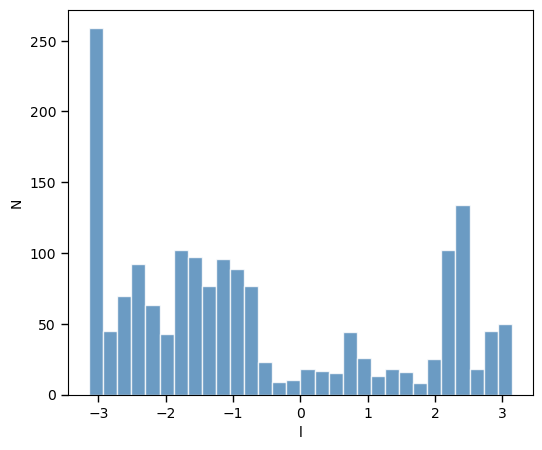

In [9]:
fig = plt.figure(figsize=(6, 5))
plt.hist(catalogo_tabela['l'], bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("l", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

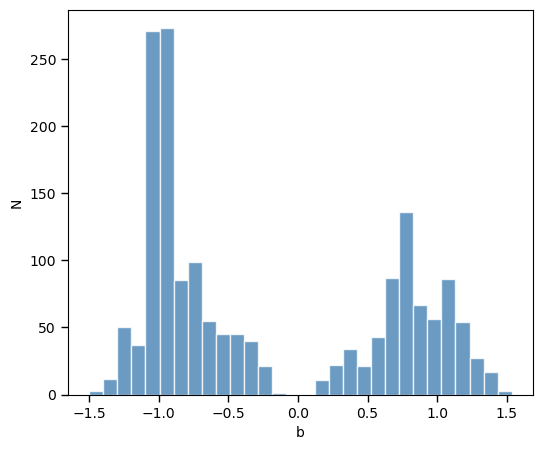

In [10]:
fig = plt.figure(figsize=(6, 5))
plt.hist(catalogo_tabela['b'], bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("b", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [11]:
dataN = catalogo_tabela[(catalogo_tabela['b']>=0)]

In [12]:
len(dataN)

664

In [13]:
dataS = catalogo_tabela[(catalogo_tabela['b']<=0)]

In [14]:
len(dataS)

1037

In [15]:
zdataN = dataN['zCMB']
zedataN = dataN['zCMBERR']

mudataN = dataN['MU_SH0ES']
muedataN = dataN['MU_SH0ES_ERR_DIAG']

radataN = dataN['RA']
decdataN = dataN['DEC']

In [16]:
coord1 = SkyCoord(ra=radataN, dec=decdataN, frame='icrs', unit='deg')
coordenadas = coord1.galactic

l1 = (coordenadas.l.deg)*np.pi/180
b1 = (coordenadas.b.deg)*np.pi/180

In [17]:
l1[l1 > np.pi] = l1[l1 > np.pi] - 2*np.pi
l1[l1 < np.pi] = l1[l1 < np.pi]*(-1)

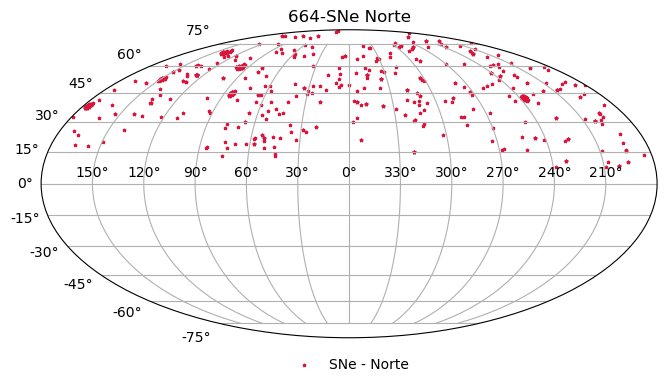

In [18]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(l1, b1, s=4, color='crimson', marker ='*', label='SNe - Norte')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('664-SNe Norte')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [19]:
zdataS = dataS['zCMB']
zedataS = dataS['zCMBERR']

mudataS = dataS['MU_SH0ES']
muedataS = dataS['MU_SH0ES_ERR_DIAG']

radataS = dataS['RA']
decdataS = dataS['DEC']

In [20]:
coord2 = SkyCoord(ra=radataS, dec=decdataS, frame='icrs', unit='deg')
coordenadas = coord2.galactic

l2 = (coordenadas.l.deg)*np.pi/180
b2 = (coordenadas.b.deg)*np.pi/180

In [21]:
l2[l2 > np.pi] = l2[l2 > np.pi] - 2*np.pi
l2[l2 < np.pi] = l2[l2 < np.pi]*(-1)

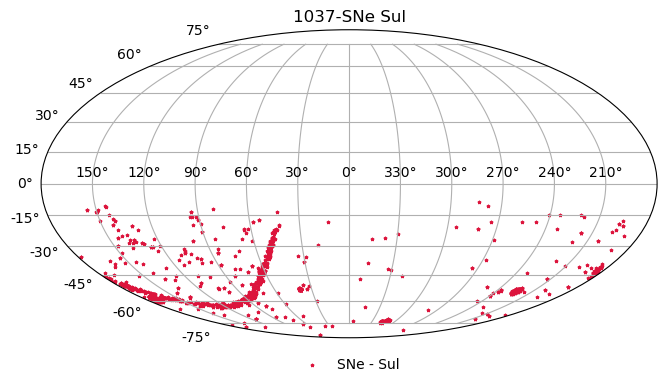

In [22]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(l2, b2, s=4, color='crimson', marker ='*', label='SNe - Sul')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('1037-SNe Sul')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

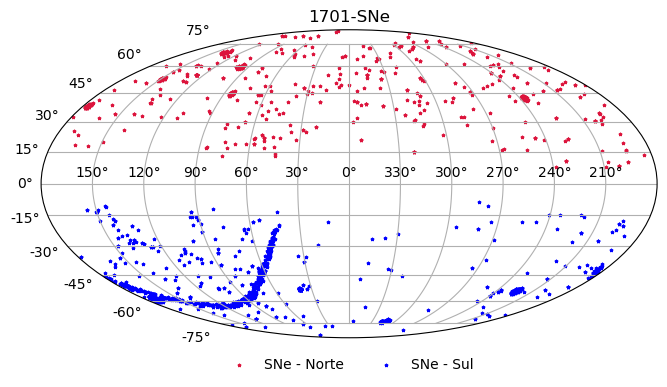

In [23]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(l1, b1, s=4, color='crimson', marker ='*', label='SNe - Norte')
plt.scatter(l2, b2, s=4, color='blue', marker ='*', label='SNe - Sul')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('1701-SNe')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

LETRA B


In [24]:
data_calota = catalogo_tabela[(catalogo_tabela['b']>=np.pi*(1/4))&(catalogo_tabela['b']<=np.pi*(1/2))]

In [25]:
len(data_calota)

340

In [26]:
zdata_calota = data_calota['zCMB']
zedata_calota = data_calota['zCMBERR']

mudata_calota = data_calota['MU_SH0ES']
muedata_calota = data_calota['MU_SH0ES_ERR_DIAG']

radata_calota = data_calota['RA']
decdata_calota = data_calota['DEC']

In [27]:
coord3 = SkyCoord(ra=radata_calota, dec=decdata_calota, frame='icrs', unit='deg')
coordenadas = coord3.galactic

l3 = (coordenadas.l.deg)*np.pi/180
b3 = (coordenadas.b.deg)*np.pi/180

In [28]:
l3[l3 > np.pi] = l3[l3 > np.pi] - 2*np.pi
l3[l3 < np.pi] = l3[l3 < np.pi]*(-1)

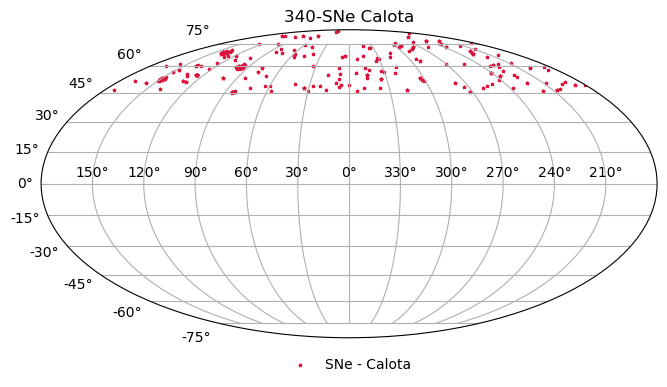

In [29]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(l3, b3, s=4, color='crimson', marker ='*', label='SNe - Calota')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('340-SNe Calota')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [118]:
data_calota1 = catalogo_tabela[(catalogo_tabela['b']>=np.pi*(1/8))&(catalogo_tabela['b']<=np.pi*(1/4))]

In [127]:
len(data_calota1)

263

In [120]:
zdata_calota1 = data_calota1['zCMB']
zedata_calota1 = data_calota1['zCMBERR']

mudata_calota1 = data_calota1['MU_SH0ES']
muedata_calota1 = data_calota1['MU_SH0ES_ERR_DIAG']

radata_calota1 = data_calota1['RA']
decdata_calota1 = data_calota1['DEC']

In [121]:
coord11 = SkyCoord(ra=radata_calota1, dec=decdata_calota1, frame='icrs', unit='deg')
coordenadas = coord11.galactic

l11 = (coordenadas.l.deg)*np.pi/180
b11 = (coordenadas.b.deg)*np.pi/180

In [122]:
l11[l11 > np.pi] = l11[l11 > np.pi] - 2*np.pi
l11[l11 < np.pi] = l11[l11 < np.pi]*(-1)

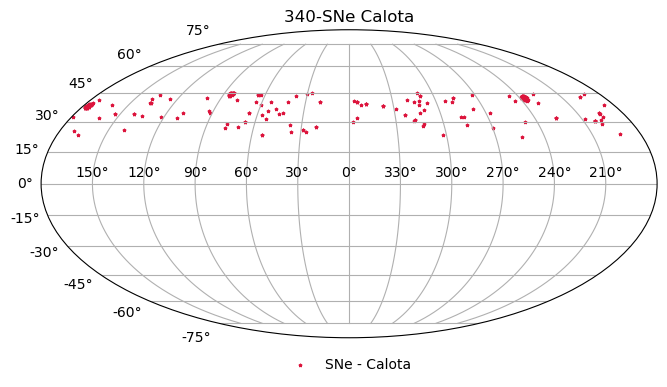

In [123]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(l11, b11, s=4, color='crimson', marker ='*', label='SNe - Calota')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('340-SNe Calota')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [124]:
data_calota2 = catalogo_tabela[(catalogo_tabela['b']>=np.pi*(1/8))&(catalogo_tabela['b']<=np.pi*(1/6))]

In [126]:
len(data_calota2)

27

In [128]:
zdata_calota2 = data_calota2['zCMB']
zedata_calota2 = data_calota2['zCMBERR']

mudata_calota2 = data_calota2['MU_SH0ES']
muedata_calota2 = data_calota2['MU_SH0ES_ERR_DIAG']

radata_calota2 = data_calota2['RA']
decdata_calota2 = data_calota2['DEC']

In [129]:
coord22 = SkyCoord(ra=radata_calota2, dec=decdata_calota2, frame='icrs', unit='deg')
coordenadas = coord22.galactic

l22 = (coordenadas.l.deg)*np.pi/180
b22 = (coordenadas.b.deg)*np.pi/180

In [130]:
l22[l22 > np.pi] = l22[l22 > np.pi] - 2*np.pi
l22[l22 < np.pi] = l22[l22 < np.pi]*(-1)

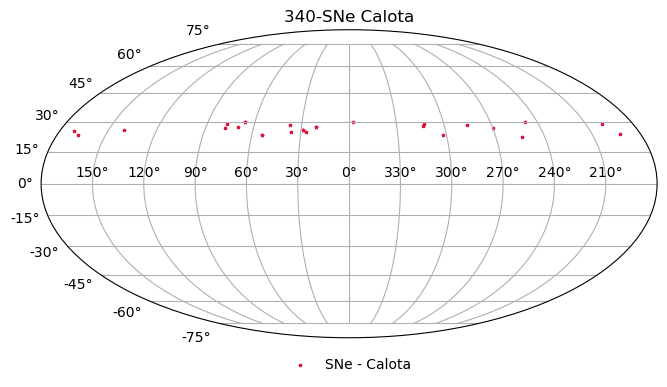

In [131]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(l22, b22, s=4, color='crimson', marker ='*', label='SNe - Calota')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('340-SNe Calota')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [132]:
data_calota3 = catalogo_tabela[(catalogo_tabela['b']>=-np.pi*(1/8))&(catalogo_tabela['b']<=np.pi*(1/4))]

In [133]:
len(data_calota3)

388

In [134]:
zdata_calota3 = data_calota3['zCMB']
zedata_calota3 = data_calota3['zCMBERR']

mudata_calota3 = data_calota3['MU_SH0ES']
muedata_calota3 = data_calota3['MU_SH0ES_ERR_DIAG']

radata_calota3 = data_calota3['RA']
decdata_calota3 = data_calota3['DEC']

In [135]:
coord33 = SkyCoord(ra=radata_calota3, dec=decdata_calota3, frame='icrs', unit='deg')
coordenadas = coord33.galactic

l33 = (coordenadas.l.deg)*np.pi/180
b33 = (coordenadas.b.deg)*np.pi/180

In [136]:
l33[l33 > np.pi] = l33[l33 > np.pi] - 2*np.pi
l33[l33 < np.pi] = l33[l33 < np.pi]*(-1)

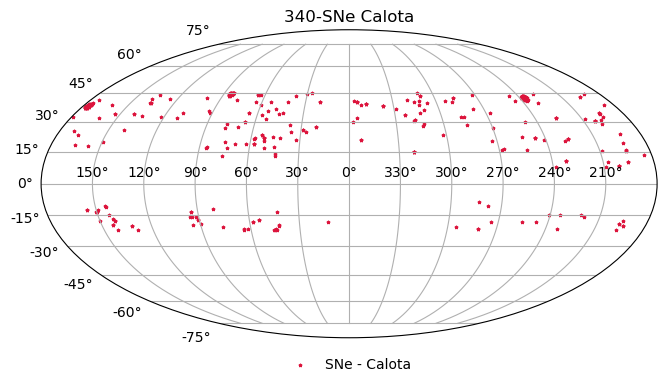

In [137]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(l33, b33, s=4, color='crimson', marker ='*', label='SNe - Calota')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('340-SNe Calota')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

LETRA C


In [30]:
dataN1 = dataN[(dataN['zCMB']>=0.001)&(dataN['zCMB']<=0.06)]
dataN2 = dataN[(dataN['zCMB']>=0.001)&(dataN['zCMB']<=0.1)]
dataN3 = dataN[(dataN['zCMB']>=0.001)&(dataN['zCMB']<=0.2)]
dataN4 = dataN[(dataN['zCMB']>=0.01)&(dataN['zCMB']<=0.06)]
dataN5 = dataN[(dataN['zCMB']>=0.015)&(dataN['zCMB']<=0.065)]
dataN6 = dataN[(dataN['zCMB']>=0.01)&(dataN['zCMB']<=0.1)]
dataN7 = dataN[(dataN['zCMB']>=0.02)&(dataN['zCMB']<=0.1)]

In [31]:
zdataN1 = dataN1['zCMB']
zedataN1 = dataN1['zCMBERR']

mudataN1 = dataN1['MU_SH0ES']
muedataN1 = dataN1['MU_SH0ES_ERR_DIAG']

radataN1 = dataN1['RA']
decdataN1 = dataN1['DEC']

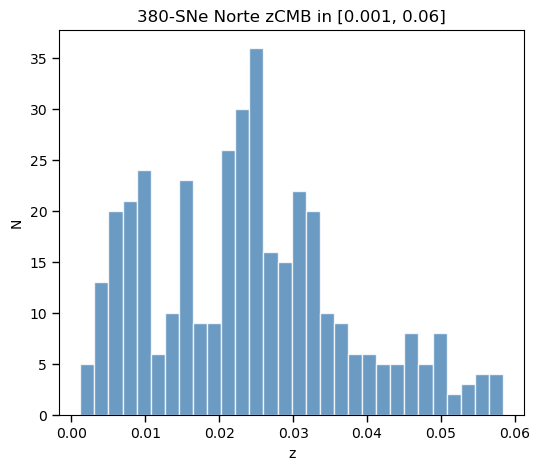

In [32]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataN1, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('380-SNe Norte zCMB in [0.001, 0.06]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [33]:
coordN1 = SkyCoord(ra=radataN1, dec=decdataN1, frame='icrs', unit='deg')
coordenadas = coordN1.galactic

lN1 = (coordenadas.l.deg)*np.pi/180
bN1 = (coordenadas.b.deg)*np.pi/180

In [34]:
len(dataN1)

380

In [35]:
lN1[lN1 > np.pi] = lN1[lN1 > np.pi] - 2*np.pi
lN1[lN1 < np.pi] = lN1[lN1 < np.pi]*(-1)

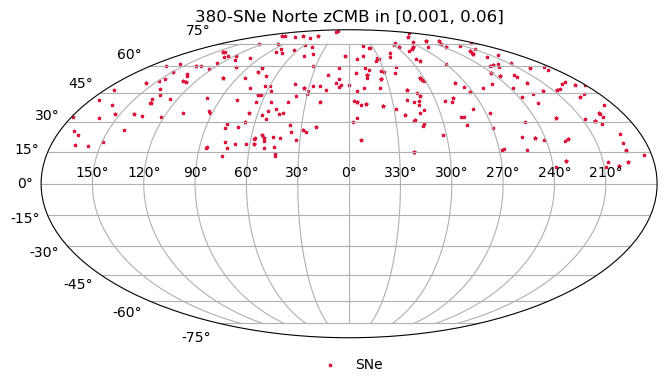

In [36]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lN1, bN1, s=4, color='crimson', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('380-SNe Norte zCMB in [0.001, 0.06]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [37]:
zdataN2 = dataN2['zCMB']
zedataN2 = dataN2['zCMBERR']

mudataN2 = dataN2['MU_SH0ES']
muedataN2 = dataN2['MU_SH0ES_ERR_DIAG']

radataN2 = dataN2['RA']
decdataN2 = dataN2['DEC']

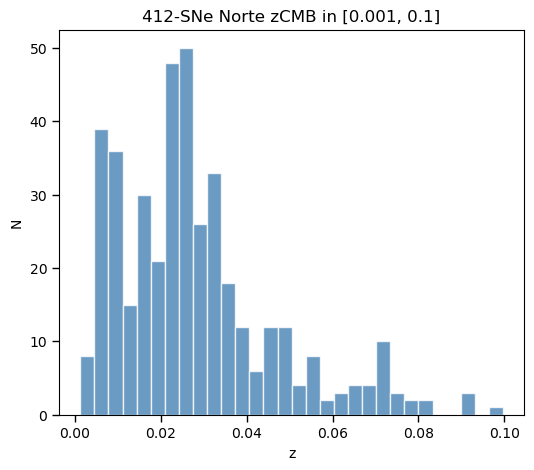

In [38]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataN2, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('412-SNe Norte zCMB in [0.001, 0.1]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [39]:
coordN2 = SkyCoord(ra=radataN2, dec=decdataN2, frame='icrs', unit='deg')
coordenadas = coordN2.galactic

lN2 = (coordenadas.l.deg)*np.pi/180
bN2 = (coordenadas.b.deg)*np.pi/180

In [40]:
len(dataN2)

412

In [41]:
lN2[lN2 > np.pi] = lN2[lN2 > np.pi] - 2*np.pi
lN2[lN2 < np.pi] = lN2[lN2 < np.pi]*(-1)

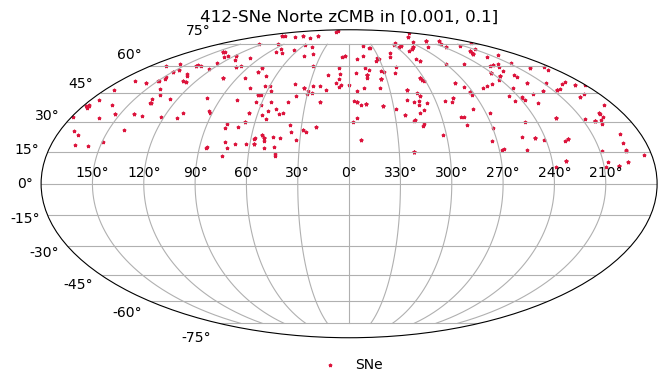

In [42]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lN2, bN2, s=4, color='crimson', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('412-SNe Norte zCMB in [0.001, 0.1]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [43]:
zdataN3 = dataN3['zCMB']
zedataN3 = dataN3['zCMBERR']

mudataN3 = dataN3['MU_SH0ES']
muedataN3 = dataN3['MU_SH0ES_ERR_DIAG']

radataN3 = dataN3['RA']
decdataN3 = dataN3['DEC']

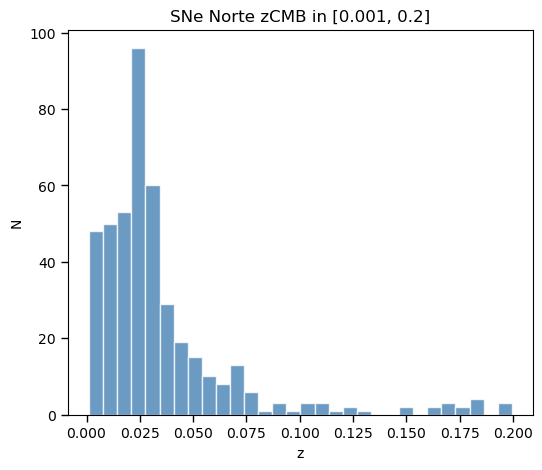

In [44]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataN3, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('SNe Norte zCMB in [0.001, 0.2]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [45]:
coordN3 = SkyCoord(ra=radataN3, dec=decdataN3, frame='icrs', unit='deg')
coordenadas = coordN3.galactic

lN3 = (coordenadas.l.deg)*np.pi/180
bN3 = (coordenadas.b.deg)*np.pi/180

In [46]:
lN3[lN3 > np.pi] = lN3[lN3 > np.pi] - 2*np.pi
lN3[lN3 < np.pi] = lN3[lN3 < np.pi]*(-1)

In [47]:
len(dataN3)

438

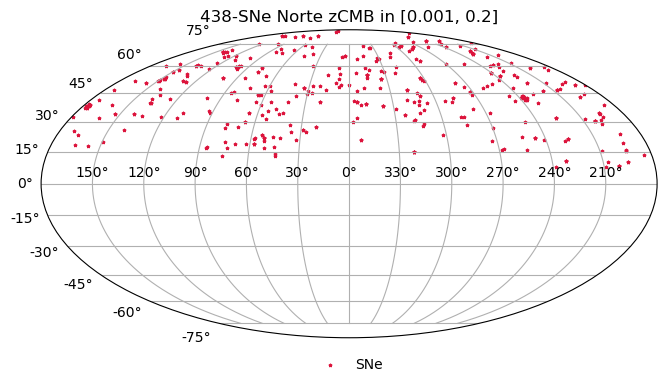

In [48]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lN3, bN3, s=4, color='crimson', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('438-SNe Norte zCMB in [0.001, 0.2]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [49]:
zdataN4 = dataN4['zCMB']
zedataN4 = dataN4['zCMBERR']

mudataN4 = dataN4['MU_SH0ES']
muedataN4 = dataN4['MU_SH0ES_ERR_DIAG']

radataN4 = dataN4['RA']
decdataN4 = dataN4['DEC']

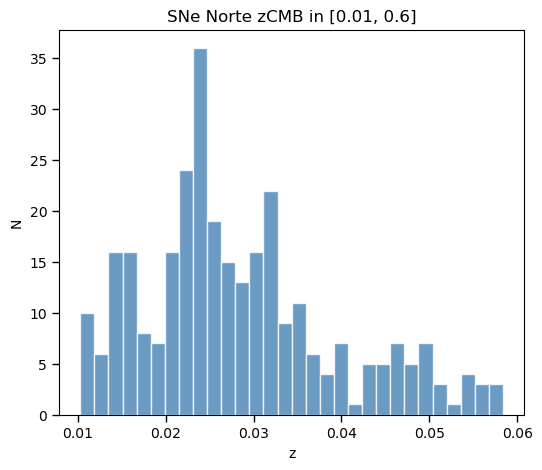

In [50]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataN4, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('SNe Norte zCMB in [0.01, 0.6]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [51]:
coordN4 = SkyCoord(ra=radataN4, dec=decdataN4, frame='icrs', unit='deg')
coordenadas = coordN4.galactic

lN4 = (coordenadas.l.deg)*np.pi/180
bN4 = (coordenadas.b.deg)*np.pi/180

In [52]:
lN4[lN4 > np.pi] = lN4[lN4 > np.pi] - 2*np.pi
lN4[lN4 < np.pi] = lN4[lN4 < np.pi]*(-1)

In [53]:
len(dataN4)

305

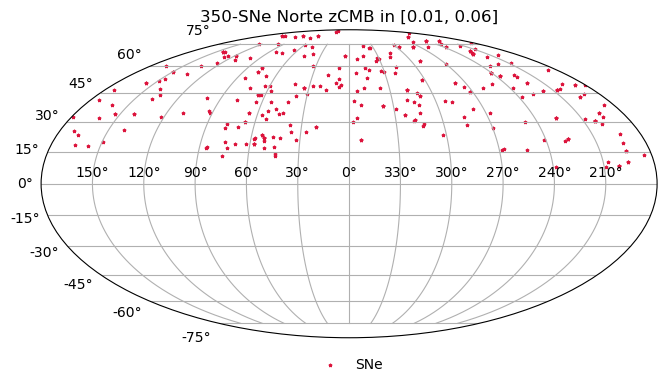

In [54]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lN4, bN4, s=4, color='crimson', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('350-SNe Norte zCMB in [0.01, 0.06]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [55]:
zdataN5 = dataN5['zCMB']
zedataN5 = dataN5['zCMBERR']

mudataN5 = dataN5['MU_SH0ES']
muedataN5 = dataN5['MU_SH0ES_ERR_DIAG']

radataN5 = dataN5['RA']
decdataN5 = dataN5['DEC']

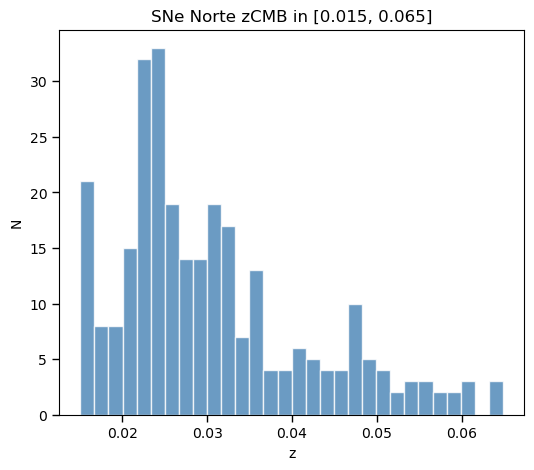

In [56]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataN5, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('SNe Norte zCMB in [0.015, 0.065]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [57]:
coordN5 = SkyCoord(ra=radataN5, dec=decdataN5, frame='icrs', unit='deg')
coordenadas = coordN5.galactic

lN5 = (coordenadas.l.deg)*np.pi/180
bN5 = (coordenadas.b.deg)*np.pi/180

In [58]:
lN5[lN5 > np.pi] = lN5[lN5 > np.pi] - 2*np.pi
lN5[lN5 < np.pi] = lN5[lN5 < np.pi]*(-1)

In [59]:
len(dataN5)

284

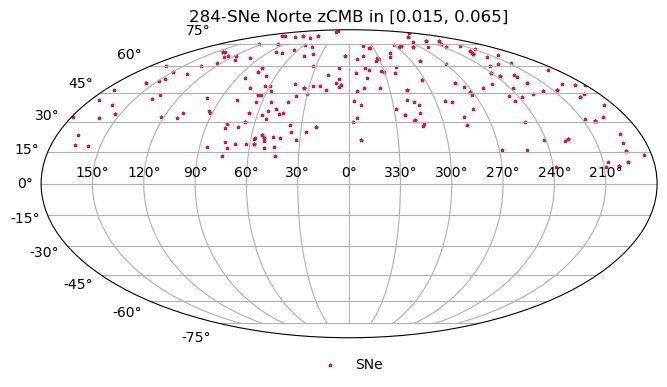

In [60]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lN5, bN5, s=4, color='crimson', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('284-SNe Norte zCMB in [0.015, 0.065]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [61]:
zdataN6 = dataN6['zCMB']
zedataN6 = dataN6['zCMBERR']

mudataN6 = dataN6['MU_SH0ES']
muedataN6 = dataN6['MU_SH0ES_ERR_DIAG']

radataN6 = dataN6['RA']
decdataN6 = dataN6['DEC']

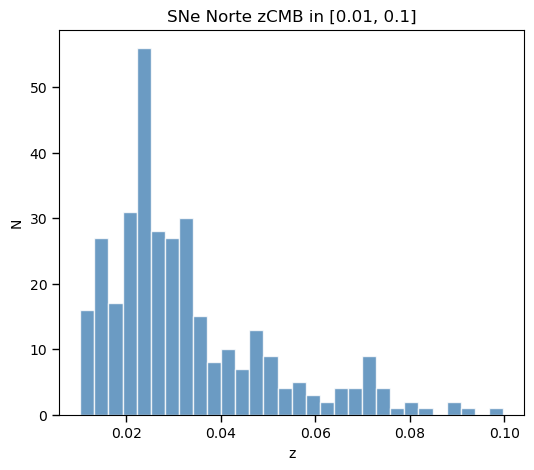

In [62]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataN6, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('SNe Norte zCMB in [0.01, 0.1]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [63]:
coordN6 = SkyCoord(ra=radataN6, dec=decdataN6, frame='icrs', unit='deg')
coordenadas = coordN6.galactic

lN6 = (coordenadas.l.deg)*np.pi/180
bN6 = (coordenadas.b.deg)*np.pi/180

In [64]:
lN6[lN6 > np.pi] = lN6[lN6 > np.pi] - 2*np.pi
lN6[lN6 < np.pi] = lN6[lN6 < np.pi]*(-1)

In [65]:
len(dataN6)

337

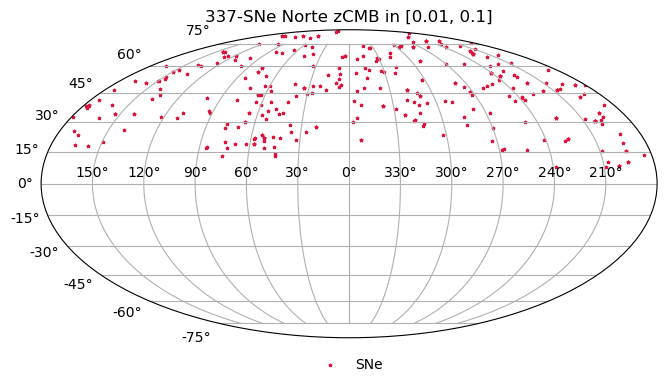

In [66]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lN6, bN6, s=4, color='crimson', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('337-SNe Norte zCMB in [0.01, 0.1]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [67]:
zdataN7 = dataN7['zCMB']
zedataN7 = dataN7['zCMBERR']

mudataN7 = dataN7['MU_SH0ES']
muedataN7 = dataN7['MU_SH0ES_ERR_DIAG']

radataN7 = dataN7['RA']
decdataN7 = dataN7['DEC']

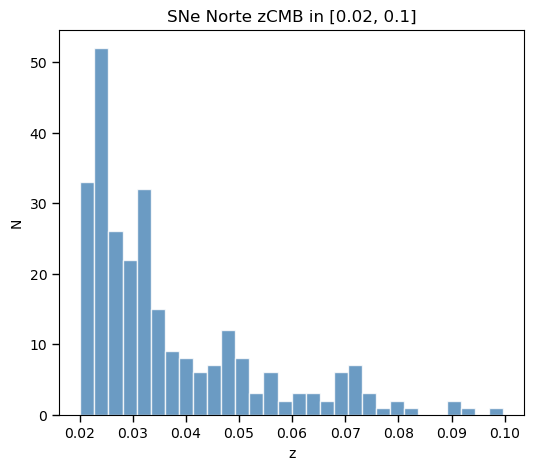

In [68]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataN7, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('SNe Norte zCMB in [0.02, 0.1]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [69]:
coordN7 = SkyCoord(ra=radataN7, dec=decdataN7, frame='icrs', unit='deg')
coordenadas = coordN7.galactic

lN7 = (coordenadas.l.deg)*np.pi/180
bN7 = (coordenadas.b.deg)*np.pi/180

In [70]:
lN7[lN7 > np.pi] = lN7[lN7 > np.pi] - 2*np.pi
lN7[lN7 < np.pi] = lN7[lN7 < np.pi]*(-1)

In [71]:
len(dataN7)

273

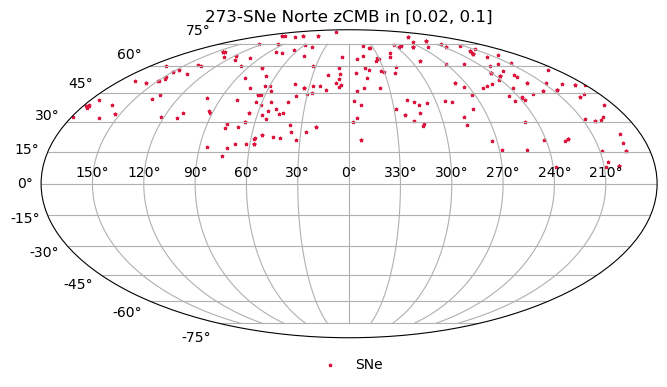

In [72]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lN7, bN7, s=4, color='crimson', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('273-SNe Norte zCMB in [0.02, 0.1]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [73]:
dataS1 = dataS[(dataS['zCMB']>=0.001)&(dataS['zCMB']<=0.06)]
dataS2 = dataS[(dataS['zCMB']>=0.001)&(dataS['zCMB']<=0.1)]
dataS3 = dataS[(dataS['zCMB']>=0.001)&(dataS['zCMB']<=0.2)]
dataS4 = dataS[(dataS['zCMB']>=0.01)&(dataS['zCMB']<=0.06)]
dataS5 = dataS[(dataS['zCMB']>=0.015)&(dataS['zCMB']<=0.065)]
dataS6 = dataS[(dataS['zCMB']>=0.01)&(dataS['zCMB']<=0.1)]
dataS7 = dataS[(dataS['zCMB']>=0.02)&(dataS['zCMB']<=0.1)]

In [74]:
zdataS1 = dataS1['zCMB']
zedataS1 = dataS1['zCMBERR']

mudataS1 = dataS1['MU_SH0ES']
muedataS1 = dataS1['MU_SH0ES_ERR_DIAG']

radataS1 = dataS1['RA']
decdataS1 = dataS1['DEC']

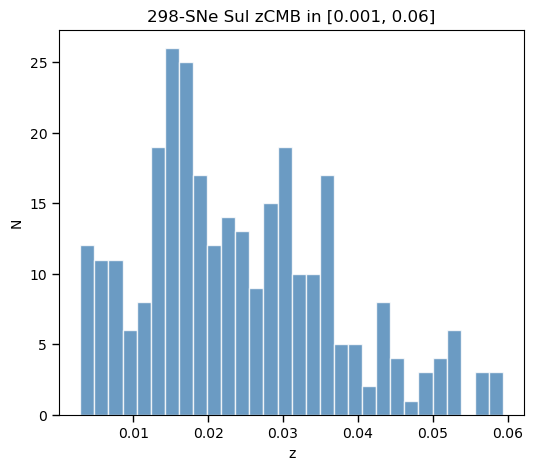

In [75]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataS1, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('298-SNe Sul zCMB in [0.001, 0.06]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [76]:
coordS1 = SkyCoord(ra=radataS1, dec=decdataS1, frame='icrs', unit='deg')
coordenadas = coordS1.galactic

lS1 = (coordenadas.l.deg)*np.pi/180
bS1 = (coordenadas.b.deg)*np.pi/180

In [77]:
len(dataS1)

298

In [78]:
lS1[lS1 > np.pi] = lS1[lS1 > np.pi] - 2*np.pi
lS1[lS1 < np.pi] = lS1[lS1 < np.pi]*(-1)

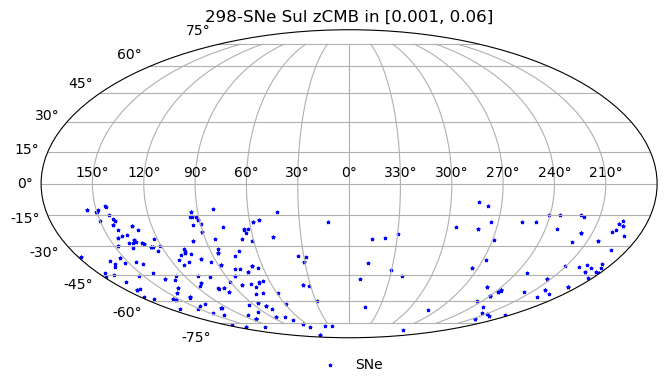

In [79]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lS1, bS1, s=4, color='blue', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('298-SNe Sul zCMB in [0.001, 0.06]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [80]:
zdataS2 = dataN2['zCMB']
zedataS2 = dataS2['zCMBERR']

mudataS2 = dataS2['MU_SH0ES']
muedataS2 = dataS2['MU_SH0ES_ERR_DIAG']

radataS2 = dataS2['RA']
decdataS2 = dataS2['DEC']

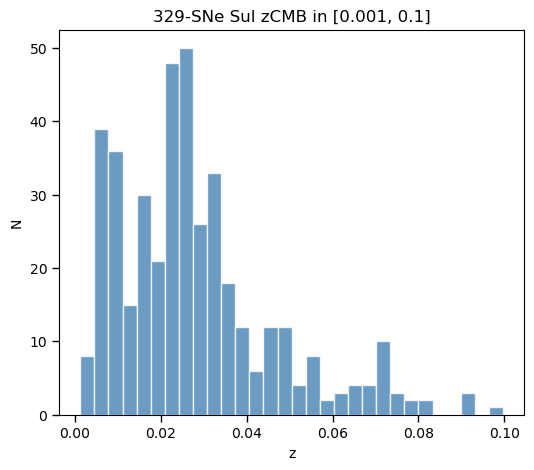

In [81]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataS2, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('329-SNe Sul zCMB in [0.001, 0.1]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [82]:
coordS2 = SkyCoord(ra=radataS2, dec=decdataS2, frame='icrs', unit='deg')
coordenadas = coordS2.galactic

lS2 = (coordenadas.l.deg)*np.pi/180
bS2 = (coordenadas.b.deg)*np.pi/180

In [83]:
len(dataS2)

329

In [84]:
lS2[lS2 > np.pi] = lS2[lS2 > np.pi] - 2*np.pi
lS2[lS2 < np.pi] = lS2[lS2 < np.pi]*(-1)

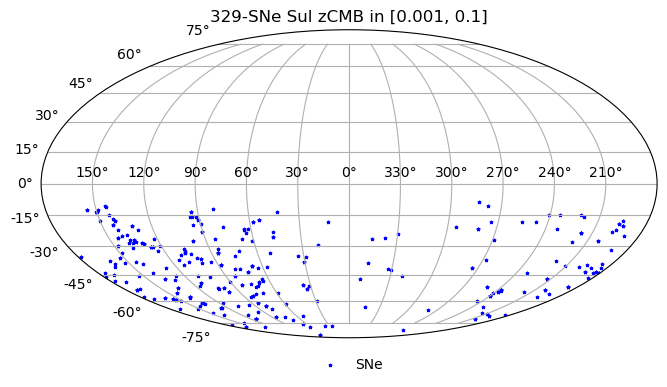

In [85]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lS2, bS2, s=4, color='blue', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('329-SNe Sul zCMB in [0.001, 0.1]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [86]:
zdataS3 = dataS3['zCMB']
zedataS3 = dataS3['zCMBERR']

mudataS3 = dataS3['MU_SH0ES']
muedataS3 = dataS3['MU_SH0ES_ERR_DIAG']

radataS3 = dataS3['RA']
decdataS3 = dataS3['DEC']

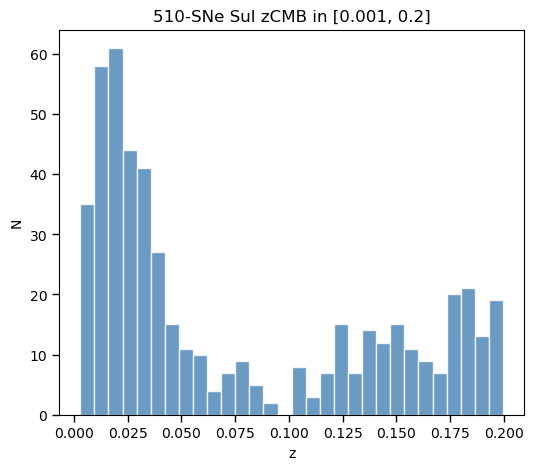

In [87]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataS3, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('510-SNe Sul zCMB in [0.001, 0.2]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [88]:
coordS3 = SkyCoord(ra=radataS3, dec=decdataS3, frame='icrs', unit='deg')
coordenadas = coordS3.galactic

lS3 = (coordenadas.l.deg)*np.pi/180
bS3 = (coordenadas.b.deg)*np.pi/180

In [89]:
lS3[lS3 > np.pi] = lS3[lS3 > np.pi] - 2*np.pi
lS3[lS3 < np.pi] = lS3[lS3 < np.pi]*(-1)

In [90]:
len(dataS3)

510

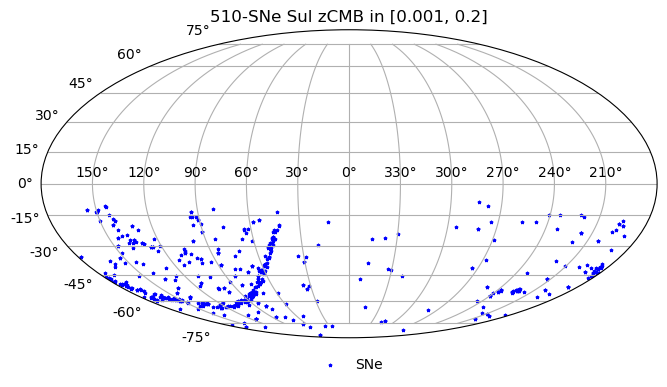

In [91]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lS3, bS3, s=4, color='blue', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('510-SNe Sul zCMB in [0.001, 0.2]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [92]:
zdataS4 = dataS4['zCMB']
zedataS4 = dataS4['zCMBERR']

mudataS4 = dataS4['MU_SH0ES']
muedataS4 = dataS4['MU_SH0ES_ERR_DIAG']

radataS4 = dataS4['RA']
decdataS4 = dataS4['DEC']

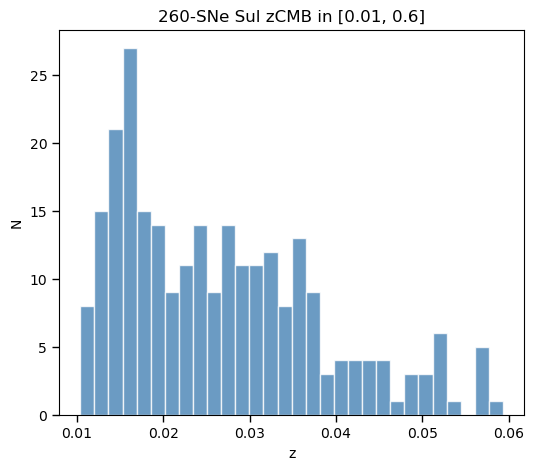

In [93]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataS4, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('260-SNe Sul zCMB in [0.01, 0.6]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [94]:
coordS4 = SkyCoord(ra=radataS4, dec=decdataS4, frame='icrs', unit='deg')
coordenadas = coordS4.galactic

lS4 = (coordenadas.l.deg)*np.pi/180
bS4 = (coordenadas.b.deg)*np.pi/180

In [95]:
lS4[lS4 > np.pi] = lS4[lS4 > np.pi] - 2*np.pi
lS4[lS4 < np.pi] = lS4[lS4 < np.pi]*(-1)

In [96]:
len(dataS4)

260

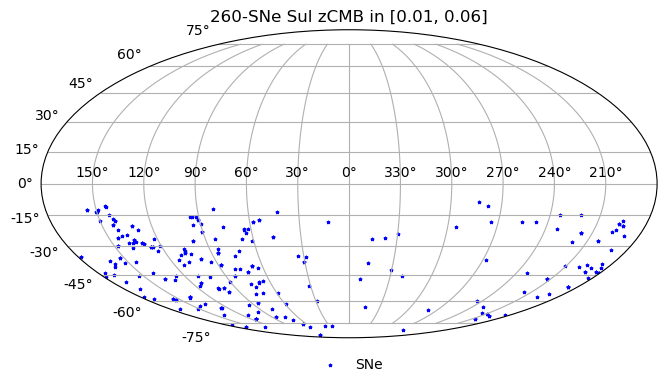

In [97]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lS4, bS4, s=4, color='blue', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('260-SNe Sul zCMB in [0.01, 0.06]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [98]:
zdataS5 = dataS5['zCMB']
zedataS5 = dataS5['zCMBERR']

mudataS5 = dataS5['MU_SH0ES']
muedataS5 = dataS5['MU_SH0ES_ERR_DIAG']

radataS5 = dataS5['RA']
decdataS5 = dataS5['DEC']

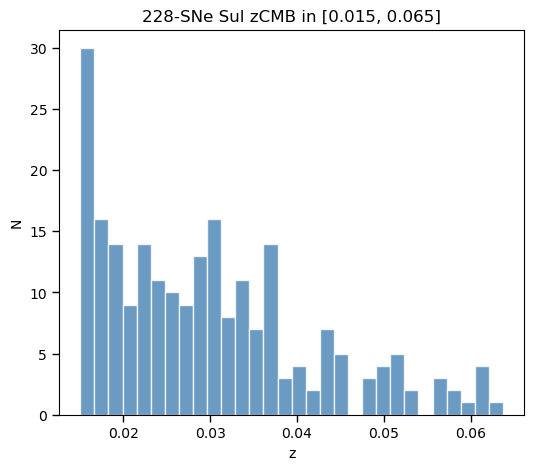

In [99]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataS5, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('228-SNe Sul zCMB in [0.015, 0.065]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [100]:
coordS5 = SkyCoord(ra=radataS5, dec=decdataS5, frame='icrs', unit='deg')
coordenadas = coordS5.galactic

lS5 = (coordenadas.l.deg)*np.pi/180
bS5 = (coordenadas.b.deg)*np.pi/180

In [101]:
lS5[lS5 > np.pi] = lS5[lS5 > np.pi] - 2*np.pi
lS5[lS5 < np.pi] = lS5[lS5 < np.pi]*(-1)

In [102]:
len(dataS5)

228

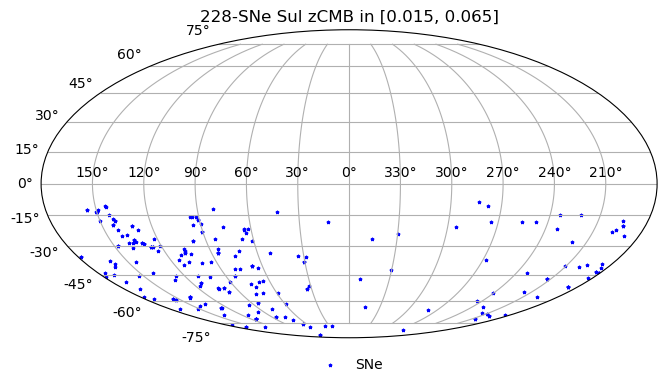

In [103]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lS5, bS5, s=4, color='blue', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('228-SNe Sul zCMB in [0.015, 0.065]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [104]:
zdataS6 = dataS6['zCMB']
zedataS6 = dataS6['zCMBERR']

mudataS6 = dataS6['MU_SH0ES']
muedataS6 = dataS6['MU_SH0ES_ERR_DIAG']

radataS6 = dataS6['RA']
decdataS6 = dataS6['DEC']

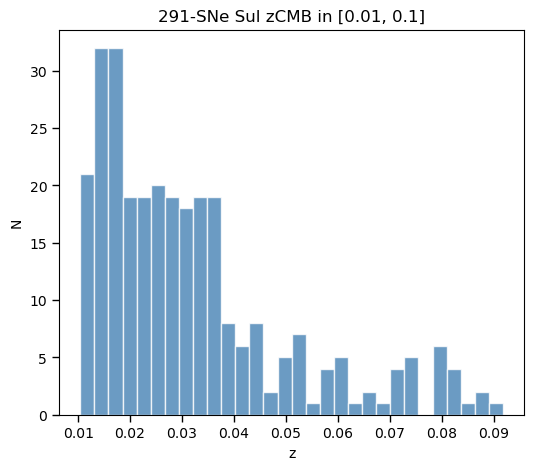

In [105]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataS6, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('291-SNe Sul zCMB in [0.01, 0.1]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [106]:
coordS6 = SkyCoord(ra=radataS6, dec=decdataS6, frame='icrs', unit='deg')
coordenadas = coordS6.galactic

lS6 = (coordenadas.l.deg)*np.pi/180
bS6 = (coordenadas.b.deg)*np.pi/180

In [107]:
lS6[lS6 > np.pi] = lS6[lS6 > np.pi] - 2*np.pi
lS6[lS6 < np.pi] = lS6[lS6 < np.pi]*(-1)

In [108]:
len(dataS6)

291

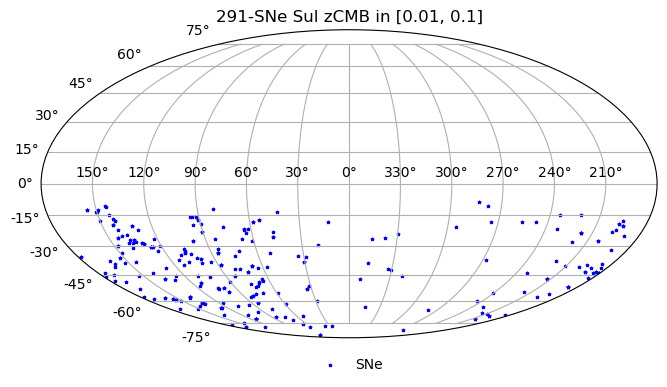

In [109]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lS6, bS6, s=4, color='blue', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('291-SNe Sul zCMB in [0.01, 0.1]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

In [110]:
zdataS7 = dataS7['zCMB']
zedataS7 = dataS7['zCMBERR']

mudataS7 = dataS7['MU_SH0ES']
muedataS7 = dataS7['MU_SH0ES_ERR_DIAG']

radataS7 = dataS7['RA']
decdataS7 = dataS7['DEC']

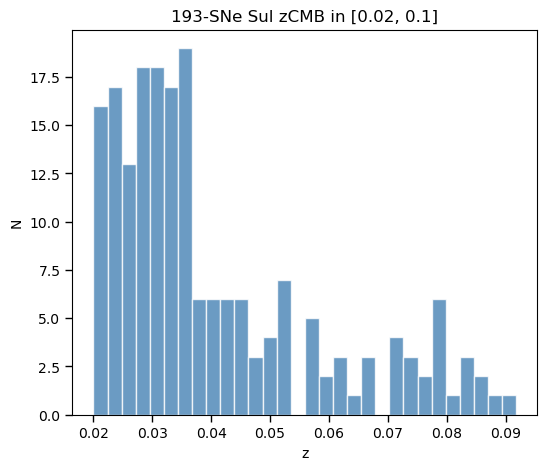

In [111]:
fig = plt.figure(figsize=(6, 5))
plt.hist(zdataS7, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.title('193-SNe Sul zCMB in [0.02, 0.1]')
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.show()

In [112]:
coordS7 = SkyCoord(ra=radataS7, dec=decdataS7, frame='icrs', unit='deg')
coordenadas = coordS7.galactic

lS7 = (coordenadas.l.deg)*np.pi/180
bS7 = (coordenadas.b.deg)*np.pi/180

In [113]:
lS7[lS7 > np.pi] = lS7[lS7 > np.pi] - 2*np.pi
lS7[lS7 < np.pi] = lS7[lS7 < np.pi]*(-1)

In [114]:
len(dataS7)

193

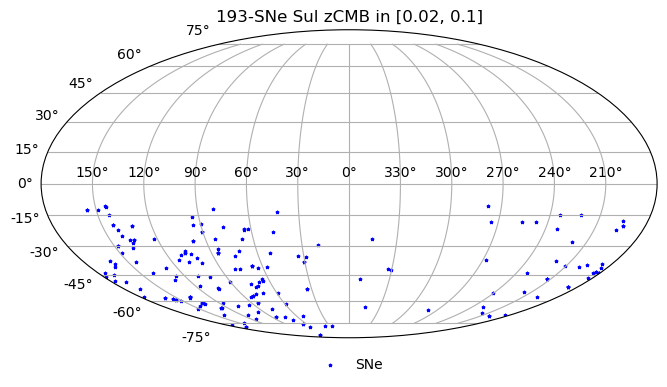

In [115]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(lS7, bS7, s=4, color='blue', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('193-SNe Sul zCMB in [0.02, 0.1]')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
plt.show()

EXTRA - FÓRMULA HAVERSINE